## Inspect Classes

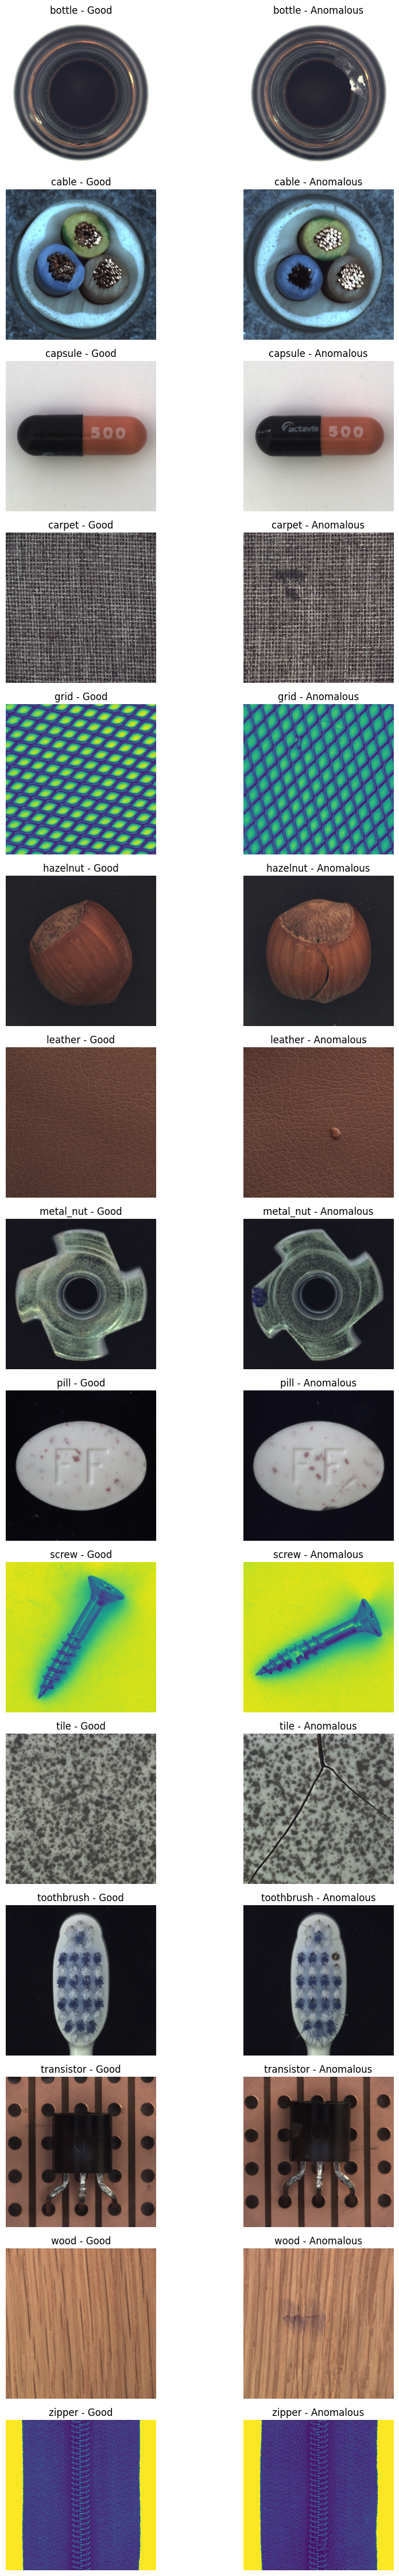

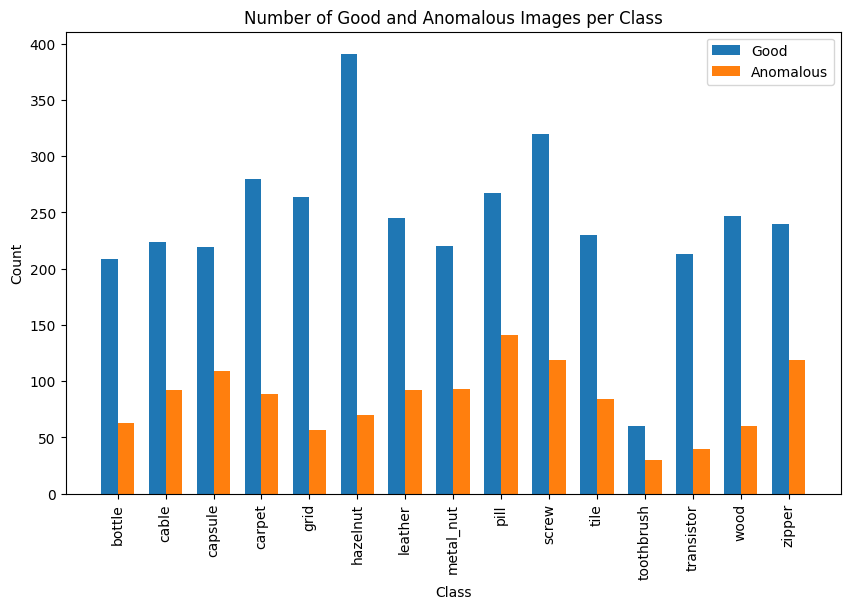

In [89]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
data_folder = 'data/'
classes = [
    "bottle", "cable", "capsule", "carpet", "grid", "hazelnut", "leather",
    "metal_nut", "pill", "screw", "tile", "toothbrush", "transistor", "wood", "zipper"
]

# Function to plot a "good" and an "anomalous" image for each class
def plot_good_and_anomalous(data_folder, classes):
    fig, axes = plt.subplots(len(classes), 2, figsize=(10, len(classes) * 3))
    
    for idx, object_name in enumerate(classes):
        # Define paths
        train_folder = os.path.join(data_folder, object_name, 'train', 'good')
        test_folder = os.path.join(data_folder, object_name, 'test')
        
        # Get "good" image
        good_image_path = os.path.join(train_folder, os.listdir(train_folder)[0])
        good_image = Image.open(good_image_path)
        
        # Find and open an "anomalous" image
        anomaly_subfolders = [f for f in os.listdir(test_folder) if f != "good"] # disregard not anamolous images from test folder
        if anomaly_subfolders:
            anomaly_folder = os.path.join(test_folder, anomaly_subfolders[0])
            anomalous_image_path = os.path.join(anomaly_folder, os.listdir(anomaly_folder)[0])
            anomalous_image = Image.open(anomalous_image_path)
        else:
            anomalous_image = None

        # Plot images
        axes[idx, 0].imshow(good_image)
        axes[idx, 0].axis('off')
        axes[idx, 0].set_title(f"{object_name} - Good")

        if anomalous_image:
            axes[idx, 1].imshow(anomalous_image)
            axes[idx, 1].axis('off')
            axes[idx, 1].set_title(f"{object_name} - Anomalous")
        else:
            axes[idx, 1].axis('off')
            axes[idx, 1].set_title(f"{object_name} - No Anomalies")
    
    plt.tight_layout()
    plt.show()

# Function to count "good" and "anomalous" images per class
def count_images(data_folder, classes):
    count_dict = {}

    for object_name in classes:
        train_folder = os.path.join(data_folder, object_name, 'train', 'good')
        test_folder = os.path.join(data_folder, object_name, 'test')
        
        # Count good images
        good_count = len(os.listdir(train_folder))
        
        # Count anomalous images
        anomaly_subfolders = [f for f in os.listdir(test_folder) if f != "good"]
        anomaly_count = sum(len(os.listdir(os.path.join(test_folder, sub))) for sub in anomaly_subfolders)

        count_dict[object_name] = {"Good": good_count, "Anomalous": anomaly_count}
    
    # Display the count in a bar plot
    labels = count_dict.keys()
    good_counts = [count_dict[cls]["Good"] for cls in labels]
    anomaly_counts = [count_dict[cls]["Anomalous"] for cls in labels]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    x = range(len(labels))
    
    ax.bar(x, good_counts, width, label='Good')
    ax.bar([p + width for p in x], anomaly_counts, width, label='Anomalous')
    
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Number of Good and Anomalous Images per Class')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()
    
    plt.show()

# Run functions
plot_good_and_anomalous(data_folder, classes)
count_images(data_folder, classes)


## Display Class Specific Data

https://www.kaggle.com/code/ahmedali30/plasticanamolydetection-svm/notebook

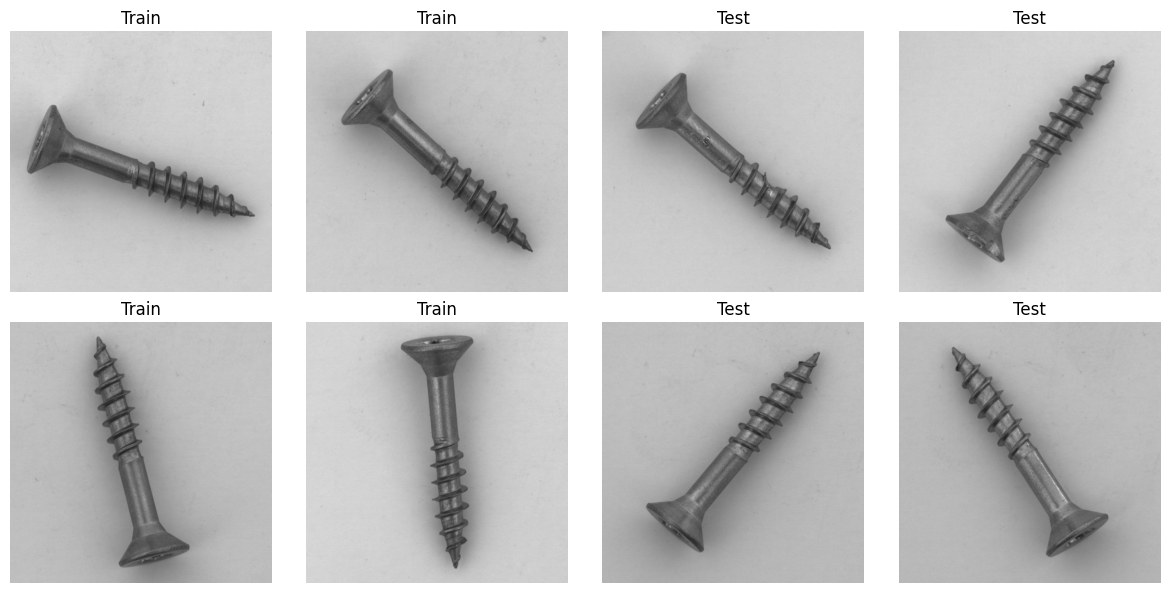

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

def show_random_images(train_folder, test_folder, num_images=8):
    """Displays a grid of random images from the training and test folders with labels."""

    # Get a list of image paths from both folders
    train_images = [os.path.join(train_folder, img) for img in os.listdir(train_folder)]
    test_images = [os.path.join(test_folder, subfolder, img) for subfolder in os.listdir(test_folder) for img in os.listdir(os.path.join(test_folder, subfolder))]

    # Combine the image paths and labels
    all_images = train_images + test_images
    all_labels = ['Train'] * len(train_images) + ['Test'] * len(test_images)

    # Randomly sample images and labels
    samples = list(zip(all_images, all_labels))
    random.shuffle(samples)
    images, labels = zip(*samples[:num_images])

    # Create a grid of subplots
    num_rows = 2
    num_cols = num_images // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

    # Display the images with labels
    for i, (image_path, label) in enumerate(zip(images, labels)):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        ax = axes.flat[i]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
data_folder = '/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/AML/AML_Project/data/'
object_name = 'screw'
train_folder = os.path.join(data_folder, object_name, 'train', 'good')
test_folder = os.path.join(data_folder, object_name, 'test')

show_random_images(train_folder, test_folder, num_images=8)


https://www.kaggle.com/code/ahmedali30/plasticanamolydetection-svm/notebook

Image shape: (150528,)


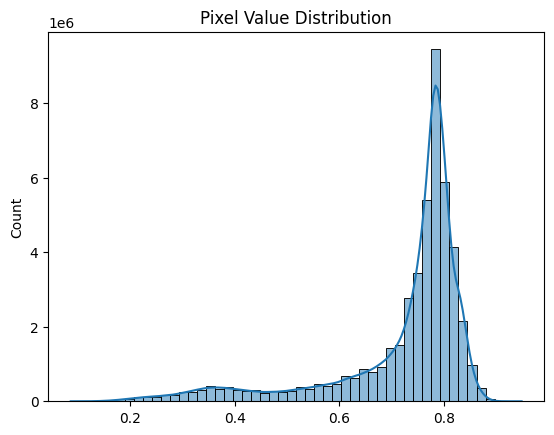

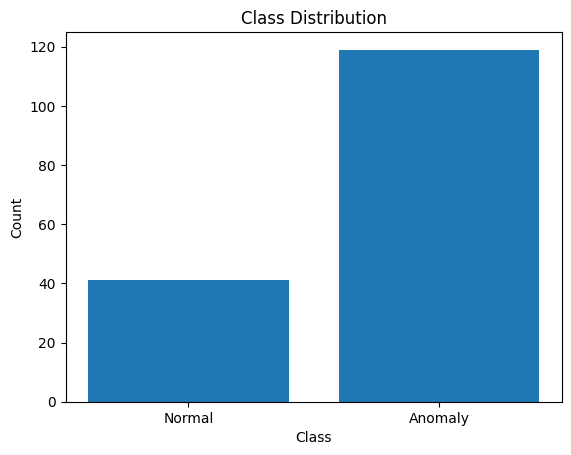

In [2]:
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Error loading image: {img_path}")
                continue
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            images.append(img.flatten())
        except Exception as e:
            print(f"Error processing image: {img_path}, Error: {e}")
    return np.array(images)

def load_test_data(test_folder_path):
    X_test = []
    y_test = []
    for subfolder in os.listdir(test_folder_path):
        subfolder_path = os.path.join(test_folder_path, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            try:
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Error loading image: {img_path}")
                    continue
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                X_test.append(img.flatten())
                if subfolder == 'good':
                    y_test.append(0)  # Normal
                else:
                    y_test.append(1)  # Anomaly
            except Exception as e:
                print(f"Error processing image: {img_path}, Error: {e}")
    return np.array(X_test), np.array(y_test)

def analyze_data_distribution(train_images, y_test):
    # Image shape analysis
    image_shape = train_images[0].shape
    print(f"Image shape: {image_shape}")

    # Pixel value distribution
    flattened_images = train_images.reshape(-1)
    sns.histplot(flattened_images, bins=50, kde=True)
    plt.title('Pixel Value Distribution')
    plt.show()

    # Class distribution
    class_counts = np.bincount(y_test)
    plt.bar(range(len(class_counts)), class_counts)
    plt.xticks(range(len(class_counts)), ['Normal', 'Anomaly'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    
data_folder = '/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/AML/AML_Project/data/'
object_name = 'screw'

train_folder = os.path.join(data_folder, object_name, 'train', 'good')
test_folder = os.path.join(data_folder, object_name, 'test')

train_images = load_images(train_folder)
X_test, y_test = load_test_data(test_folder)

# Analyze data distribution
analyze_data_distribution(train_images, y_test)

### Show Anomalies and Ground Truth

https://www.kaggle.com/code/stpeteishii/toothbrush-anomalies-autoencoder

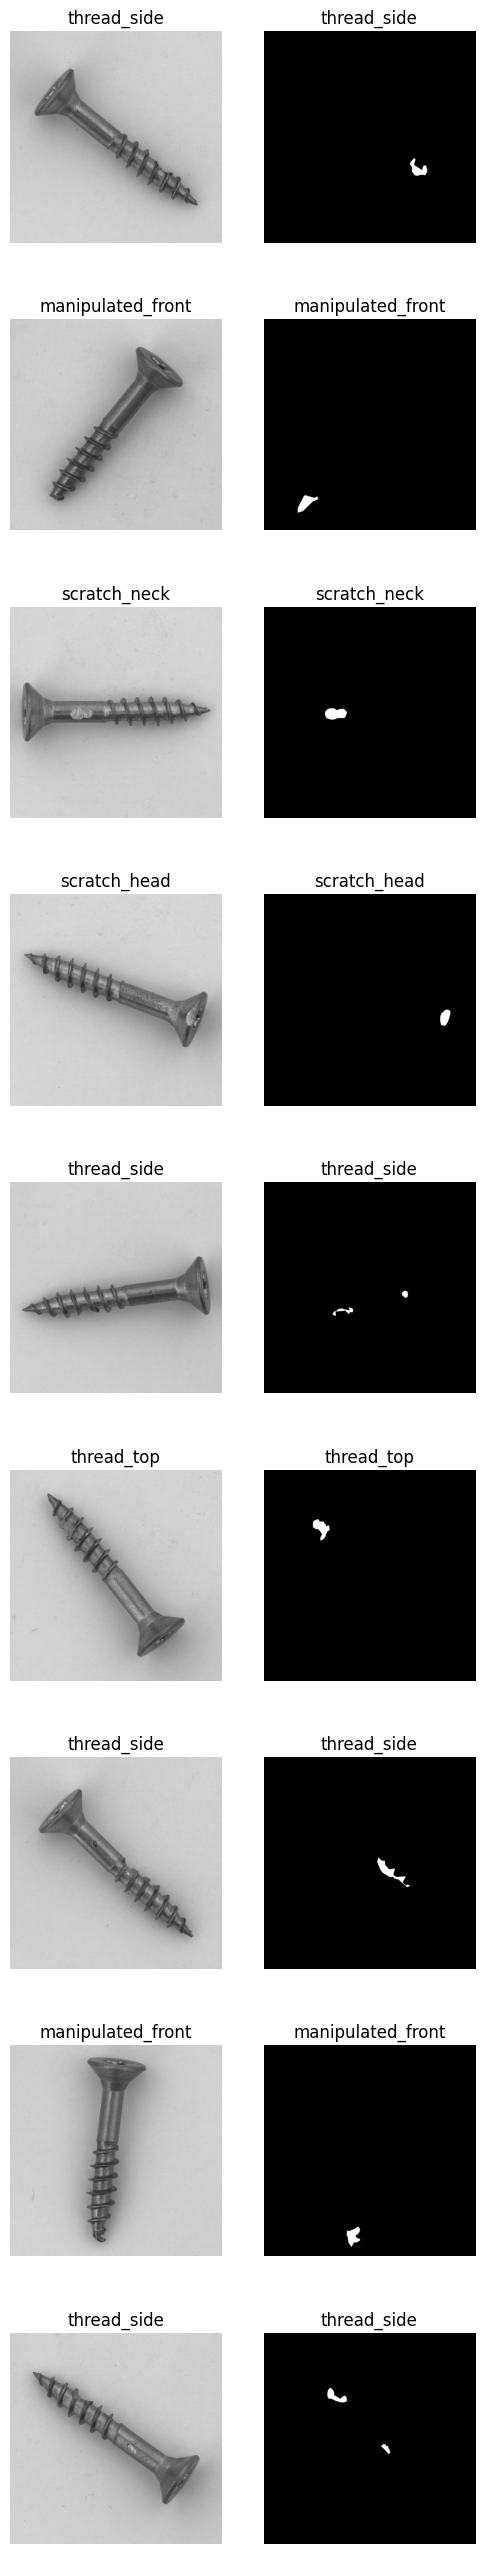

In [9]:
paths=[]
data_folder = '/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/AML/AML_Project/data/'
object_name = 'screw'

for dirname, _, filenames in os.walk('/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/AML/AML_Project/data/screw/test'):
    for filename in filenames:
        if dirname.split('/')[-1]!='good':
            paths+=[(os.path.join(dirname, filename))]
paths=random.sample(paths,9)

dir0='/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/3_Semester/AML/AML_Project/data/screw/ground_truth'

fig, axs = plt.subplots(9,2,figsize=(6,33))
for i in range(9):
    r=i

    path=paths[i]
    img = plt.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label=path.split('/')[-2]
    ax=axs[r][0].axis("off")
    ax=axs[r][0].set_title(label)
    ax=axs[r][0].imshow(img)

    path=paths[i]
    file=path.split('/')[-1].split('.')[0]+'_mask.png'
    label=path.split('/')[-2]    
    path2=os.path.join(dir0,label,file)
    img = plt.imread(path2)
    ax=axs[r][1].axis("off")
    ax=axs[r][1].set_title(label)
    ax=axs[r][1].imshow(img,cmap="gray")
    
plt.show()

## Vanilla Autoencoder

Chosen Hyperparamter as similar to

Found 256 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 160 images belonging to 6 classes.


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_184 (Conv2D)             │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_161         │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_161 (LeakyReLU)     │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_185 (Conv2D)             │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_162         │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_162 (LeakyReLU)     │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_186 (Conv2D)             │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_163         │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_163 (LeakyReLU)     │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_69 (UpSampling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_188 (Conv2D)             │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_165         │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_165 (LeakyReLU)     │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_70 (UpSampling2D) │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_189 (Conv2D)             │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_166         │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_166 (LeakyReLU)     │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_71 (UpSampling2D) │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 335,747 (1.28 MB)

 Trainable params: 334,851 (1.28 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - loss: 0.0521 - val_loss: 0.0182
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - loss: 0.0054 - val_loss: 0.0386
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - loss: 0.0016 - val_loss: 0.0237
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - loss: 9.8718e-04 - val_loss: 0.0166
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 8.3207e-04 - val_loss: 0.0141
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 7.6326e-04 - val_loss: 0.0133
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - loss: 7.3174e-04 - val_loss: 0.0131
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 7.3081e-04 - val_loss: 0.0129
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 6.9121e-04 - val_loss: 0.0129
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - loss: 6.3206e-04 - val_loss: 0.0126
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - loss: 6.3837e-04 - val_loss: 0.0124
Epoch 12/100
16/16 ━━━━━━━━━━━━

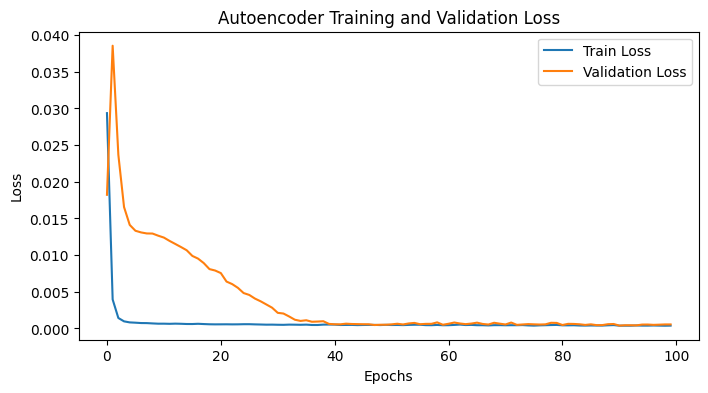

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set up device configuration for M1 GPU if available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)


#######################
###### Load Data ######

# Image preprocessing and augmentation
category = 'screw'
data_dir = f'data/{category}'
train_dir = f'{data_dir}/train'
test_dir = f'{data_dir}/test'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    shuffle=False
)


##########################
###### Create Model ######

def build_autoencoder(input_shape=(256, 256, 3)):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Bottleneck
    encoded = Conv2D(256, (3, 3), padding='same')(x)
    encoded = BatchNormalization()(encoded)
    encoded = LeakyReLU()(encoded)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    # Output layer with sigmoid activation for pixel values in [0, 1]
    decoded = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Build and summarize the model
autoencoder = build_autoencoder()
autoencoder.summary()


###############################
###### Train Autoencoder ###### 

import math

steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)


# Train the autoencoder
history = autoencoder.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
)

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Save model
# autoencoder.save('autoencoder_model.h5')


## Plot Reconstructions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


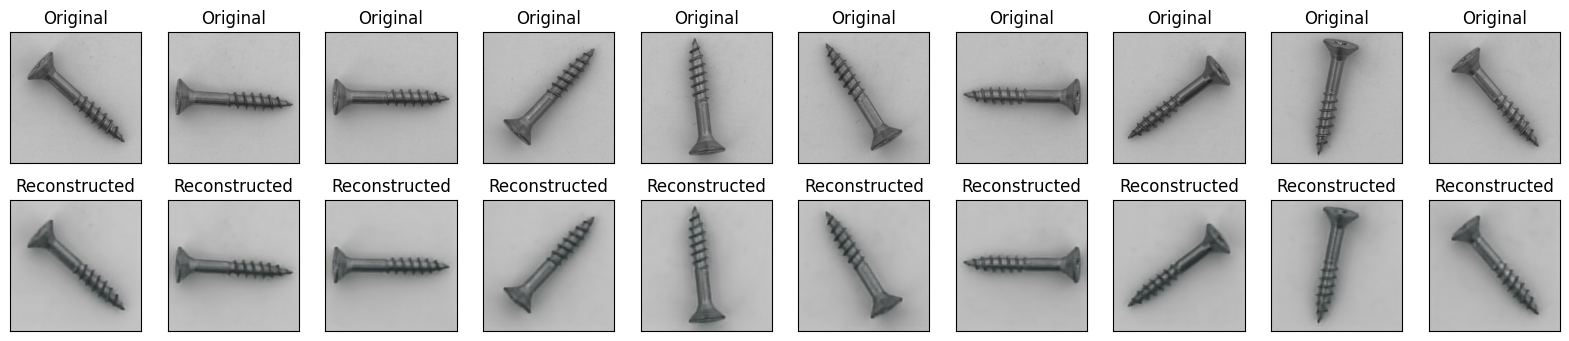

In [60]:
# Fetch a batch of images
original_images, _ = next(test_generator)  # Ignore labels since class_mode='input'

# Generate reconstructions
reconstructed_images = autoencoder.predict(original_images)

# Ensure the images are in float32 and within the range [0, 1]
original_images = original_images.astype('float32')
reconstructed_images = np.clip(reconstructed_images.astype('float32'), 0, 1)

def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_images(original_images, reconstructed_images, n=10)

## Evaluate the Autoencoder

Found 64 images belonging to 1 classes.
Total number of images in validation set: 64
Reconstructing image batch No 1 out of 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
Reconstructing image batch No 2 out of 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
Applied Threshoold is: 0.0005661267321556807


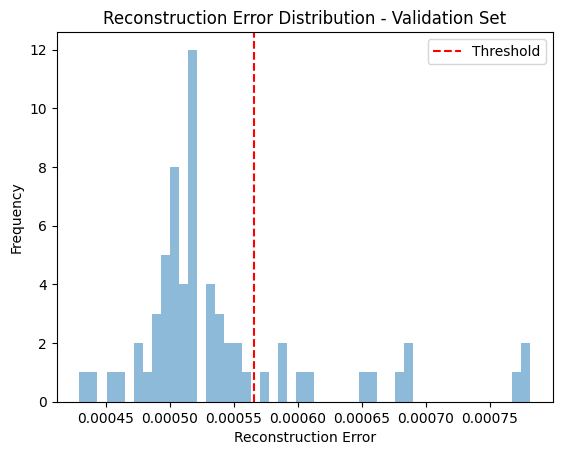

Found 160 images belonging to 6 classes.
Total number of images in test set: 160
Reconstructing image batch No 1 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
Reconstructing image batch No 2 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
Reconstructing image batch No 3 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
Reconstructing image batch No 4 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
Reconstructing image batch No 5 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.67        41
     Anomaly       1.00      0.66      0.79       119

    accuracy                           0.74       160
   macro avg       0.75      0.83      0.73       160
weighted avg       0.87      0.74      0.76       160

Confusion Matrix:
 [[41  0]
 [41 78]]
Anomalies detected:78
Anomalies in test set:119


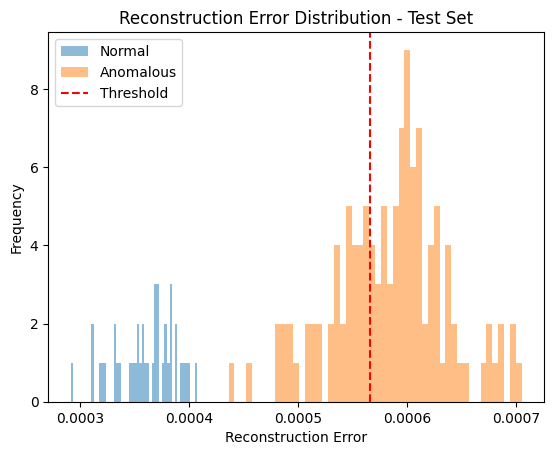

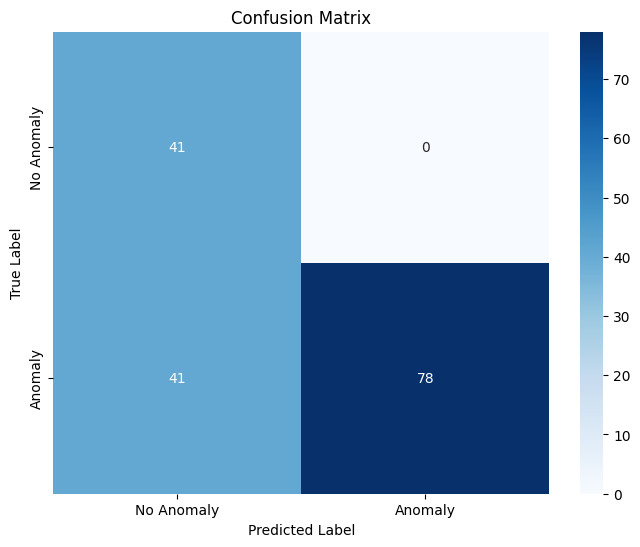

In [120]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###############################
###### Calculate Threshold ####

# Configure ImageDataGenerator to automatically generate labels based on subfolder structure
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='input',  # Use 'input' since we're reconstructing images
    shuffle=False,
    subset='validation'  # Specify the validation subset
)

# Print the total number of images in the test set
print(f"Total number of images in validation set: {validation_generator.samples}")

# Calculate the number of batches in the validation set
num_val_batches = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

# Function to caluculate errors of the validation set, used to calculate the treshold
def calculate_validation_errors(autoencoder, validation_generator, num_val_batches):
    val_errors = []
    for i, (batch_images, _) in enumerate(validation_generator):
        if i >= num_val_batches:
            break
        print(f"Reconstructing image batch No {i+1} out of {num_val_batches}")
        # Use batch_images for prediction
        reconstructed_batch = autoencoder.predict(batch_images)
        # Compute reconstruction error
        batch_errors = np.mean(np.square(batch_images - reconstructed_batch), axis=(1, 2, 3))
        val_errors.extend(batch_errors)
    return np.array(val_errors)

validation_errors = calculate_validation_errors(autoencoder, validation_generator, num_val_batches)


# Using the 80th percentile to set the threshold
threshold = np.percentile(validation_errors, 80)
print(f"Applied Threshoold is: {threshold}")

# Plot econstruction Error Distribution
plt.hist(validation_errors, bins=50, alpha=0.5)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Validation Set')
plt.show()


###############################
######### Test AE #############

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # To get labels for evaluation
    shuffle=False
)
# Print the total number of images in the test set
print(f"Total number of images in test set: {test_generator.samples}")

num_test_batches = int(np.ceil(test_generator.samples / test_generator.batch_size))

def calculate_test_errors_and_labels(autoencoder, test_generator, num_test_batches):
    test_errors = []
    true_labels = []
    for i, (batch_images, batch_labels) in enumerate(test_generator):
        if i >= num_test_batches:
            break
        print(f"Reconstructing image batch No {i+1} out of {num_test_batches}")
        reconstructed_batch = autoencoder.predict(batch_images)
        batch_errors = np.mean(np.square(batch_images - reconstructed_batch), axis=(1, 2, 3))
        test_errors.extend(batch_errors)
        true_labels.extend(batch_labels)
    return np.array(test_errors), np.array(true_labels)

test_errors, true_labels = calculate_test_errors_and_labels(autoencoder, test_generator, num_test_batches)

# generating correct labels
true_labels = np.where((true_labels == [1, 0, 0, 0, 0, 0]).all(axis=1), 0, 1) 


#############################
######### Classify ##########

# Predicted labels: 0 for normal (error <= threshold), 1 for anomaly (error > threshold)
predicted_labels = (test_errors > threshold).astype(int)



#############################
######### Evaluate ##########

print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
print(f"Anomalies detected:{sum(predicted_labels)}")
print(f"Anomalies in test set:{sum(true_labels)}")



# Reconstruction Error Distribution
normal_errors = test_errors[true_labels == 0]
anomalous_errors = test_errors[true_labels == 1]

plt.hist(normal_errors, bins=50, alpha=0.5, label='Normal')
plt.hist(anomalous_errors, bins=50, alpha=0.5, label='Anomalous')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Test Set')
plt.show()


# Confusion Matrix
class_names = ['No Anomaly', 'Anomaly']

# Optionally normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a pandas DataFrame for the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Detect anomalies with the AE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


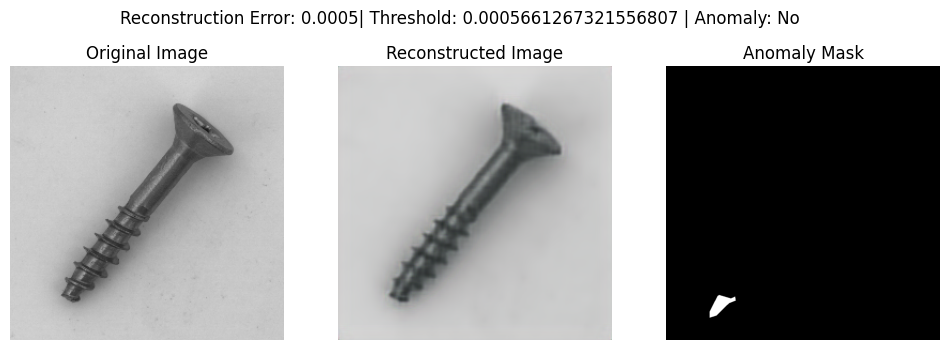

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


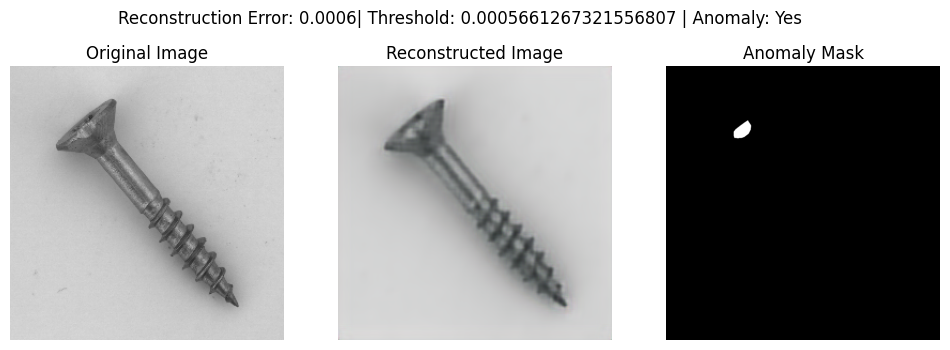

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


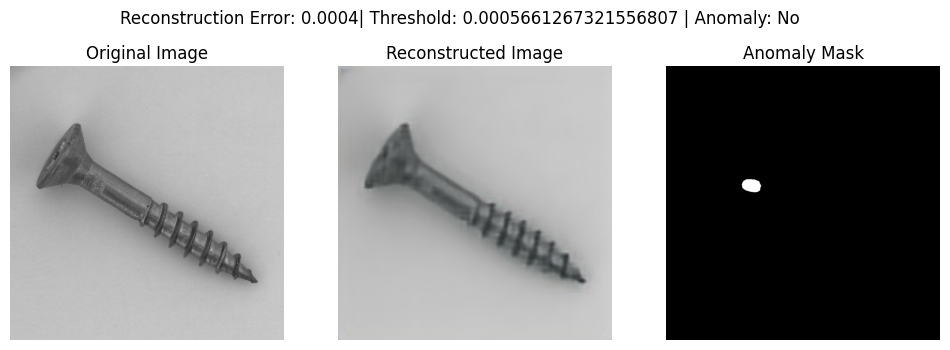

In [118]:
import os
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess an image for the autoencoder."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0  # Normalize to [0, 1] and set to float32
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def calculate_reconstruction_error(original, reconstructed):
    """Calculate the mean squared error between original and reconstructed images."""
    return np.mean((original - reconstructed) ** 2)

def predict_anomaly_and_plot(autoencoder, image_path, mask_dir, threshold=0.02):
    """
    Predict if an image is an anomaly based on reconstruction error
    and plot original, reconstructed, and mask images.
    
    Parameters:
        autoencoder (Model): The trained autoencoder model.
        image_path (str): Path to the image file.
        mask_dir (str): Directory containing anomaly mask images.
        threshold (float): Error threshold to classify as anomaly.
    
    Returns:
        bool: True if anomaly, False otherwise.
        float: The reconstruction error.
    """
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Reconstruct the image with the autoencoder
    reconstructed_img = autoencoder.predict(img)

    # Ensure reconstructed image is in float32 format
    reconstructed_img = reconstructed_img.astype('float32')
    
    # Calculate reconstruction error
    error = calculate_reconstruction_error(img, reconstructed_img)
    
    # Classify as anomaly if error exceeds the threshold
    is_anomaly = error > threshold

    # Generate the corresponding mask path
    file_name = os.path.basename(image_path).split('.')[0] + '_mask.png'
    label = os.path.basename(os.path.dirname(image_path))
    mask_path = os.path.join(mask_dir, label, file_name)
    
    # Load the mask image if it exists
    if os.path.exists(mask_path):
        mask_img = plt.imread(mask_path)
    else:
        mask_img = None

    # Plot original, reconstructed, and mask images
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img[0])  # Remove batch dimension for display
    plt.title("Original Image")
    plt.axis("off")
    
    # Reconstructed image
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_img[0])  # Remove batch dimension for display
    plt.title("Reconstructed Image")
    plt.axis("off")
    
    # Anomaly mask
    plt.subplot(1, 3, 3)
    if mask_img is not None:
        plt.imshow(mask_img, cmap="gray")
        plt.title("Anomaly Mask")
    else:
        plt.text(0.5, 0.5, 'No Mask Available', ha='center', va='center', fontsize=12)
    plt.axis("off")
    
    plt.suptitle(f"Reconstruction Error: {error:.4f}| Threshold: {threshold} | Anomaly: {'Yes' if is_anomaly else 'No'}")
    plt.show()
    
    return is_anomaly, error

# Example usage
mask_dir = 'data/screw/ground_truth'
image_paths = [
    'data/screw/test/manipulated_front/000.png',
    'data/screw/test/scratch_head/000.png', 
    'data/screw/test/scratch_neck/000.png' 
]

for path in image_paths: 
    is_anomaly, error = predict_anomaly_and_plot(autoencoder, path, mask_dir, threshold=threshold)
